In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
# Load the dataset
data = pd.read_csv('encounters.csv')

In [90]:
# Data Cleaning
# Convert START and STOP columns to datetime format
data['START'] = pd.to_datetime(data['START'])
data['STOP'] = pd.to_datetime(data['STOP'])

In [92]:
# Calculate the duration of each encounter in hours
data['DURATION'] = (data['STOP'] - data['START']).dt.total_seconds() / 3600

In [96]:
# Fill missing values in REASONCODE and REASONDESCRIPTION with 'Unknown'
data['REASONCODE'].fillna('Unknown', inplace=True)

In [98]:
data['REASONDESCRIPTION'].fillna('Unknown', inplace=True)

In [100]:
# Replace negative or zero costs in financial columns with NaN
financial_cols = ['BASE_ENCOUNTER_COST', 'TOTAL_CLAIM_COST', 'PAYER_COVERAGE']
data[financial_cols] = data[financial_cols].replace({0: np.nan, -1: np.nan})

In [102]:
# Add a new column for payer coverage percentage
data['PAYER_PERCENT'] = (data['PAYER_COVERAGE'] / data['TOTAL_CLAIM_COST']) * 100

In [104]:
# Visualization Setup
sns.set_style("whitegrid")

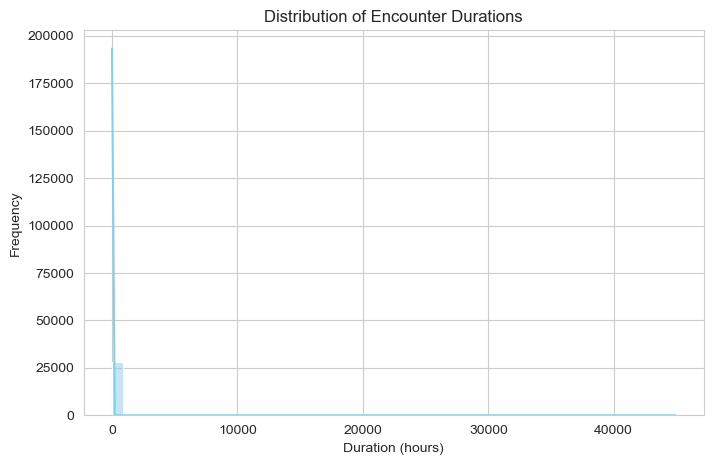

In [106]:
# Graph 1: Distribution of encounter durations
plt.figure(figsize=(8, 5))
sns.histplot(data['DURATION'], bins=50, kde=True, color="skyblue")
plt.title('Distribution of Encounter Durations')
plt.xlabel('Duration (hours)')
plt.ylabel('Frequency')
plt.show()

C:\Users\pp912\AppData\Local\Temp\ipykernel_34568\300432893.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_cost_by_class.index, y=avg_cost_by_class.values, palette="viridis")


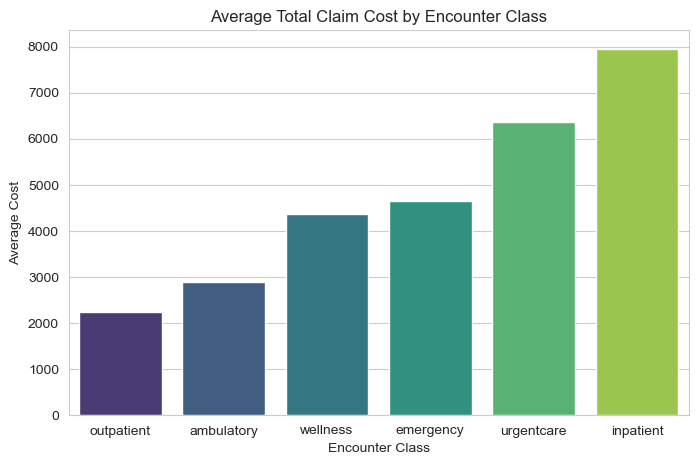

In [108]:
# Graph 2: Average total claim cost by encounter class
plt.figure(figsize=(8, 5))
avg_cost_by_class = data.groupby('ENCOUNTERCLASS')['TOTAL_CLAIM_COST'].mean().sort_values()
sns.barplot(x=avg_cost_by_class.index, y=avg_cost_by_class.values, palette="viridis")
plt.title('Average Total Claim Cost by Encounter Class')
plt.xlabel('Encounter Class')
plt.ylabel('Average Cost')
plt.show()

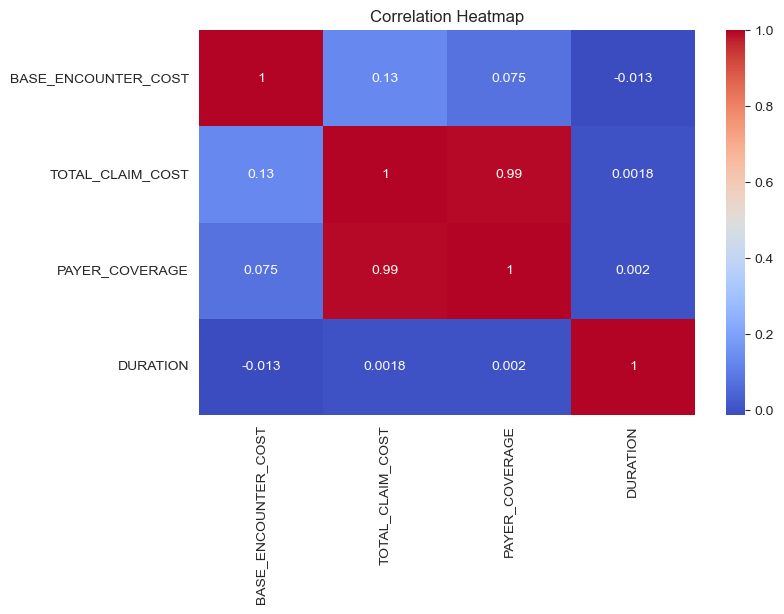

In [110]:
# Graph 3: Correlation heatmap of numerical features
plt.figure(figsize=(8, 5))
sns.heatmap(data[financial_cols + ['DURATION']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

C:\Users\pp912\AppData\Local\Temp\ipykernel_34568\1787217423.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='ENCOUNTERCLASS', y='BASE_ENCOUNTER_COST', palette="Set2")


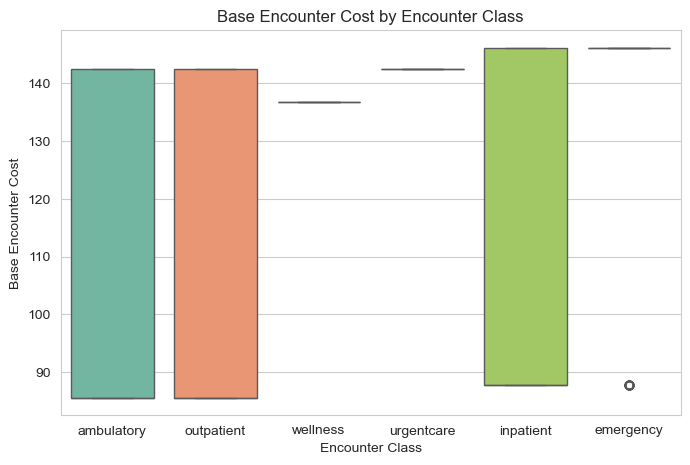

In [112]:
# Graph 4: Distribution of base encounter costs
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x='ENCOUNTERCLASS', y='BASE_ENCOUNTER_COST', palette="Set2")
plt.title('Base Encounter Cost by Encounter Class')
plt.xlabel('Encounter Class')
plt.ylabel('Base Encounter Cost')
plt.show()


C:\Users\pp912\AppData\Local\Temp\ipykernel_34568\783995995.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_reasons.index, x=top_reasons.values, palette="muted")


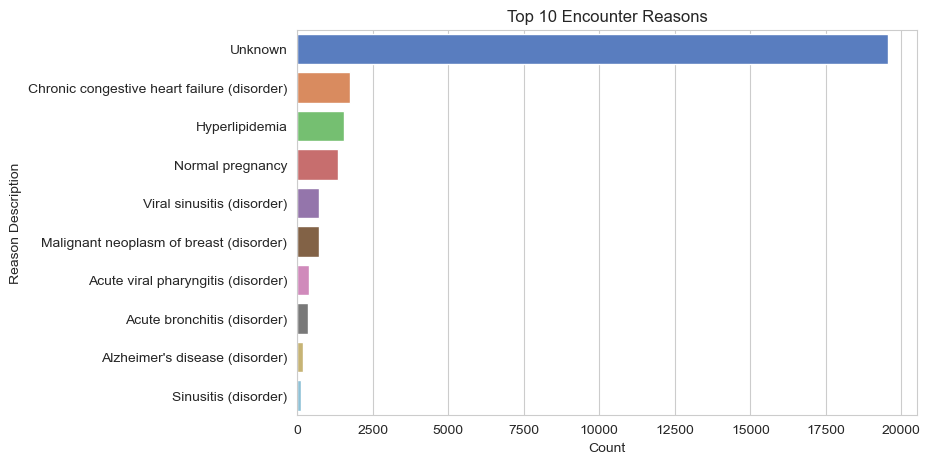

In [114]:
# Graph 5: Count of encounters by reason description
plt.figure(figsize=(8, 5))
top_reasons = data['REASONDESCRIPTION'].value_counts().nlargest(10)
sns.barplot(y=top_reasons.index, x=top_reasons.values, palette="muted")
plt.title('Top 10 Encounter Reasons')
plt.xlabel('Count')
plt.ylabel('Reason Description')
plt.show()

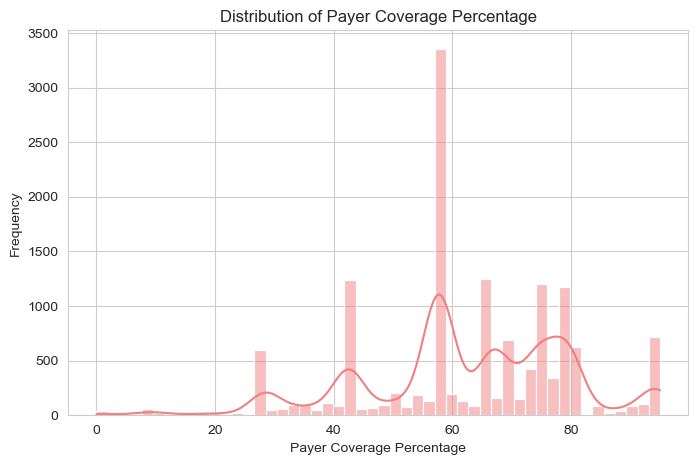

In [116]:
# Graph 6: Distribution of payer coverage percentage
plt.figure(figsize=(8, 5))
sns.histplot(data['PAYER_PERCENT'], bins=50, kde=True, color="lightcoral")
plt.title('Distribution of Payer Coverage Percentage')
plt.xlabel('Payer Coverage Percentage')
plt.ylabel('Frequency')
plt.show()


                                                CONCLUSION
The analysis highlights significant variation in encounter durations, costs, and reasons across different classes. Financial metrics like BASE_ENCOUNTER_COST and TOTAL_CLAIM_COST are critical drivers of healthcare resource allocation, and their variability warrants further investigation. The distribution of payer coverage suggests potential inequities in insurance claim management, which could be explored for policy adjustments.